# 讀取資料

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from ccuhdf import get_path, VNAxDC
# data = np.flip(data, axis=1).T
# data = data.T
data_filepath = get_path('.hdf5', title = 'open .hdf5 file contains MEASURMENT data.')
print('measurement data file path:\n', data_filepath)

measurement data file path:
 C:/Users/user/Desktop/QEL專案/MIRROR/Hsu_mirror(source)/274ms only x2=160.01mm (no x1)_II_debackground.hdf5


# Plot整張圖

file:C:/Users/user/Desktop/QEL專案/MIRROR/Hsu_mirror(source)/274ms only x2=160.01mm (no x1)_II_debackground.hdf5


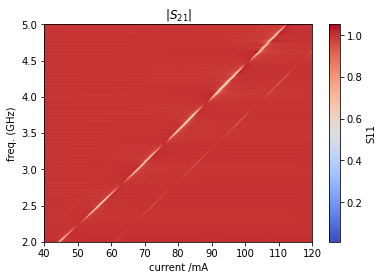

In [ ]:
data = VNAxDC.get_data(data_filepath)
info = VNAxDC.get_info(data_filepath, print_info=False)
fig, ax, extent, flipfunc = VNAxDC.get_ploting_objs(info)
 
data_0 = flipfunc(data)

'''def contrast(data):

    if abs(data)>1:
    
'''
print(f'file:{data_filepath}')

im = ax.imshow(abs(data_0), cmap='coolwarm', aspect='auto',extent= extent)
plt.colorbar(im).set_label(info['VNA - trace'] )



plt.xlabel('current /mA')
plt.ylabel('freq. (GHz)')
plt.title(r'$|S_{21}|$')
#plt.text(56,3.1,f'(file:{data_filepath})', ha='center')
plt.show()




In [ ]:
s = data_0.shape
print(s)

print(info)

(3001, 401)
{'VNA - trace': 'S11', 'VNA - # of points': 3001, 'VNA - # of traces': 401, 'VNA - start frequency': 2000000000.0, 'VNA - stop frequency': 5000000000.0, 'DC1 - sweep': False, 'DC1 - current': 0.04, 'DC2 - sweep': True, 'DC2 - start current': 0.04, 'DC2 - stop current': 0.12, 'DC2 - # of steps': 401}


# 切個Traces(確實)

(3001, 401)


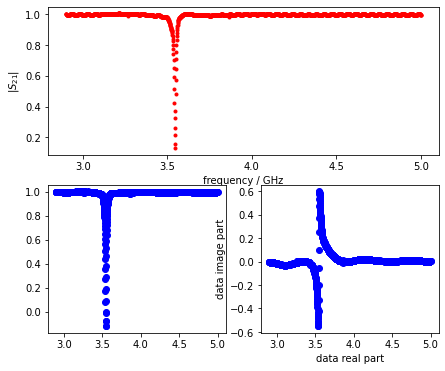

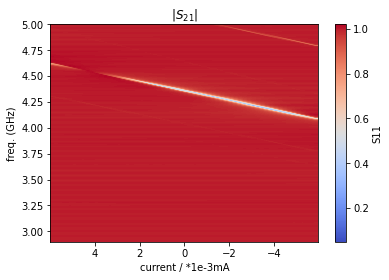

In [26]:
def get_fslice(info, frange):
    f0 = info['VNA - start frequency']
    f1 = info['VNA - stop frequency']
    nf = info['VNA - # of points']
    i0 = info['DC2 - start current']
    i1 = info['DC2 - stop current']
    ni = info['DC2 - # of steps']
    step = (f1 - f0) / nf
    step_i = (i1 - i0) / ni
    
    current = np.linspace(i0, i1, ni)
    frq = np.linspace(f0, f1, nf)
    return slice(int( (frange[0] - f0) // step - 1), 
                 int( (frange[1] - f0) // step + 1)) , frq, step_i

strat_f, stop_f = 2.9e+9, 5e+9
screen , frq , step_i = get_fslice(info, [strat_f, stop_f])  #3.5e+9,6e+9
trace_no = 201

#screen = slice(None)
s = data_0.shape
print(s)


plt.figure(figsize= (7,6))

plt.subplot(211)
#Vmax = np.maximum(abs(data[:, trace_no]), 0.3)
plt.plot(frq[screen]/1e+9, abs( data[:, trace_no:trace_no+1])[screen], 'r .')
#plt.ylim(0,0.08)
plt.xlabel( 'frequency / GHz')
plt.ylabel('$|S_{21}|$')
#plt.title(f'Trace No.{trace_no}')
plt.subplot(223)
plt.plot(frq[screen]/1e+9, np.real(data[:, trace_no:trace_no+1])[screen],'bo')
plt.subplot(224)
plt.plot(frq[screen]/1e+9, np.imag(data[:, trace_no:trace_no+1])[screen],'bo')
plt.xlabel('data real part')
plt.ylabel('data image part')
plt.title

d_trace = 30
extent = [ d_trace*1000*step_i, -1000*d_trace*step_i, min(frq[screen]/1e+9), max(frq[screen]/1e+9)]

fig, ax = plt.subplots(figsize=(6, 4))
#plt.imshow(abs(data_0), cmap='coolwarm', aspect='auto',)
im = ax.imshow(abs(data[:,trace_no-d_trace:trace_no+d_trace ])[screen], cmap='coolwarm', aspect='auto', extent = extent)
plt.colorbar(im).set_label(info['VNA - trace'] )
plt.xlabel('current / *1e-3mA')
plt.ylabel('freq. (GHz)')
plt.title(r'$|S_{21}|$')
plt.show()
